## Opening and Exploring the United_Kingdom.h5 file

In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import folium

# Open the file in read mode, and get keys from .h5 file
file_path = "United_Kingdom.h5"
with h5py.File(file_path, "r") as h5_file:
    print("Keys in the dataset:", list(h5_file.keys()))  # List all top-level keys (datasets/groups)

Keys in the dataset: ['Lucas_Point_31583110', 'Lucas_Point_31603108', 'Lucas_Point_31603112', 'Lucas_Point_31603624', 'Lucas_Point_31603628', 'Lucas_Point_31623628', 'Lucas_Point_31643620', 'Lucas_Point_31643632', 'Lucas_Point_31663612', 'Lucas_Point_31663616', 'Lucas_Point_31663620', 'Lucas_Point_31683624', 'Lucas_Point_31703616', 'Lucas_Point_31703622', 'Lucas_Point_31723614', 'Lucas_Point_31723632', 'Lucas_Point_31743608', 'Lucas_Point_31743612', 'Lucas_Point_31743618', 'Lucas_Point_31743622', 'Lucas_Point_31743634', 'Lucas_Point_31763604', 'Lucas_Point_31763612', 'Lucas_Point_31763614', 'Lucas_Point_31763616', 'Lucas_Point_31763618', 'Lucas_Point_31783604', 'Lucas_Point_31783608', 'Lucas_Point_31783610', 'Lucas_Point_31783620', 'Lucas_Point_31783624', 'Lucas_Point_31783630', 'Lucas_Point_31783632', 'Lucas_Point_31783634', 'Lucas_Point_31803598', 'Lucas_Point_31803606', 'Lucas_Point_31803622', 'Lucas_Point_31803632', 'Lucas_Point_31803634', 'Lucas_Point_31803652', 'Lucas_Point_31823

The dataset is organised by the LUCAS points as {key}. 
The next three functions below explore the substructures of the files to reveal the Sentinel-2 images and image bands at the various time steps.

In [2]:
# Explore each dataset in the .h5 file`
with h5py.File(file_path, "r") as h5_file:
    for key in h5_file.keys():
        dataset = h5_file[key]
        print(f"Dataset: {key}")
        print(f"Shape: {dataset.shape}, Dtype: {dataset.dtype}")

Dataset: Lucas_Point_31583110
Shape: (26, 64, 64), Dtype: [('B2', '<u2'), ('B3', '<u2'), ('B4', '<u2'), ('B5', '<u2'), ('B6', '<u2'), ('B7', '<u2'), ('B8', '<u2'), ('B8A', '<u2'), ('B11', '<u2'), ('B12', '<u2'), ('SCL', 'u1')]
Dataset: Lucas_Point_31603108
Shape: (26, 64, 64), Dtype: [('B2', '<u2'), ('B3', '<u2'), ('B4', '<u2'), ('B5', '<u2'), ('B6', '<u2'), ('B7', '<u2'), ('B8', '<u2'), ('B8A', '<u2'), ('B11', '<u2'), ('B12', '<u2'), ('SCL', 'u1')]
Dataset: Lucas_Point_31603112
Shape: (26, 64, 64), Dtype: [('B2', '<u2'), ('B3', '<u2'), ('B4', '<u2'), ('B5', '<u2'), ('B6', '<u2'), ('B7', '<u2'), ('B8', '<u2'), ('B8A', '<u2'), ('B11', '<u2'), ('B12', '<u2'), ('SCL', 'u1')]
Dataset: Lucas_Point_31603624
Shape: (29, 64, 64), Dtype: [('B2', '<u2'), ('B3', '<u2'), ('B4', '<u2'), ('B5', '<u2'), ('B6', '<u2'), ('B7', '<u2'), ('B8', '<u2'), ('B8A', '<u2'), ('B11', '<u2'), ('B12', '<u2'), ('SCL', 'u1')]
Dataset: Lucas_Point_31603628
Shape: (29, 64, 64), Dtype: [('B2', '<u2'), ('B3', '<u2'), ('B

In [3]:
#  Load and inspect a single LUCAS data point
with h5py.File(file_path, "r") as h5_file:
    # Select a dataset (e.g., the first key)
    sample_key = list(h5_file.keys())[12]  
    # sample_key = "Lucas_Point_31603628"
    sample_data = h5_file[sample_key][:]  # Load entire dataset
    
    print(f"Dataset {sample_key} shape: {sample_data.shape}")
    print(f"Available bands: {sample_data.dtype.names}")  # List all bands
    print(dict(h5_file[sample_key].attrs))

Dataset Lucas_Point_31703616 shape: (29, 64, 64)
Available bands: ('B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B8A', 'B11', 'B12', 'SCL')
{'Coordinates': array([-7.91219324, 54.3568387 ]), 'Feature_id': '00170000000000005cd2', 'Geom_type': 'Point', 'Image_ID': array(['20180106T114451_20180106T114446_T29UNA',
       '20180111T114439_20180111T114433_T29UNA',
       '20180124T115349_20180124T115352_T29UNA',
       '20180129T115401_20180129T115355_T29UNA',
       '20180203T115359_20180203T115353_T29UNA',
       '20180220T114339_20180220T114341_T29UNA',
       '20180225T114351_20180225T114345_T29UNA',
       '20180320T115401_20180320T115451_T29UNA',
       '20180506T114351_20180506T114351_T29UNA',
       '20180516T114351_20180516T114441_T29UNA',
       '20180524T115359_20180524T115357_T29UNA',
       '20180526T114351_20180526T114350_T29UNA',
       '20180529T115401_20180529T115401_T29UNA',
       '20180608T115401_20180608T115359_T29UNA',
       '20180628T115401_20180628T115400_T29UNA',
     

Dataset Lucas_Point_33543148 has 20 time steps.


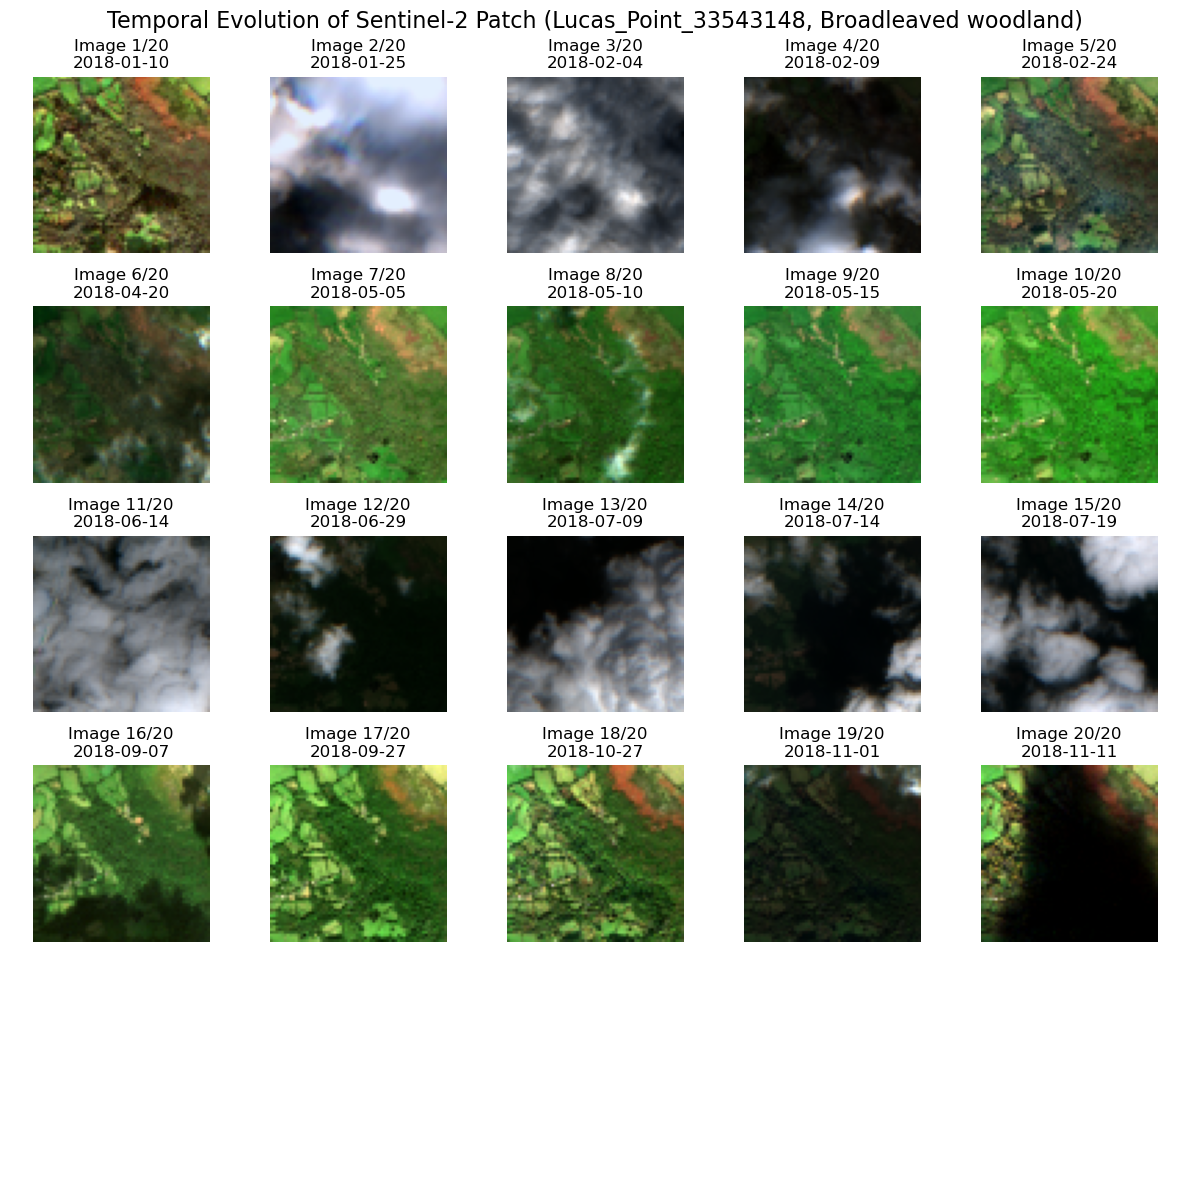

In [8]:
# Visualise time steps
with h5py.File(file_path, "r") as h5_file:
    # Select a dataset (first key in the file)
    sample_key = list(h5_file.keys())[2200]
    dataset = h5_file[sample_key]
    image_ids = [img.decode() if isinstance(img, bytes) else img for img in dataset.attrs["Image_ID"]]
    data = dataset[:]  # (n_images, 64, 64), dtype has band names
    sample_data = h5_file[sample_key][:]  # Load entire dataset
    
    num_time_steps = sample_data.shape[0]  # Number of available time steps
    print(f"Dataset {sample_key} has {num_time_steps} time steps.")
    attrs = dict(h5_file[sample_key].attrs)
    lc1_label = attrs.get("lc1_label", "Unknown")

    # Set grid size (adjust based on time steps)
    grid_size = int(np.ceil(np.sqrt(num_time_steps)))  # Square root for near-equal rows & cols

    fig, axes = plt.subplots(grid_size, grid_size, figsize=(12, 12))
    axes = axes.flatten()  # Flatten in case of non-square grids

    for i in range(num_time_steps):  
        # Extract RGB bands (B4, B3, B2)
        rgb_image = np.stack([sample_data[i]['B4'], sample_data[i]['B3'], sample_data[i]['B2']], axis=-1)
        rgb_image = (rgb_image - np.min(rgb_image)) / (np.max(rgb_image) - np.min(rgb_image))  # Normalize
        date_str = image_ids[i][:8]
        date_fmt = f"{date_str[:4]}-{date_str[4:6]}-{date_str[6:]}"

        axes[i].imshow(rgb_image)
        axes[i].axis("off")
        axes[i].set_title(f"Image {i+1}/{data.shape[0]}\n{date_fmt}")

    # Hide unused subplots
    for j in range(num_time_steps, len(axes)):
        axes[j].axis("off")

    plt.suptitle(f"Temporal Evolution of Sentinel-2 Patch ({sample_key}, {lc1_label})", fontsize=16)
    plt.tight_layout()
    plt.show()

Visualizing time step 9 of 29


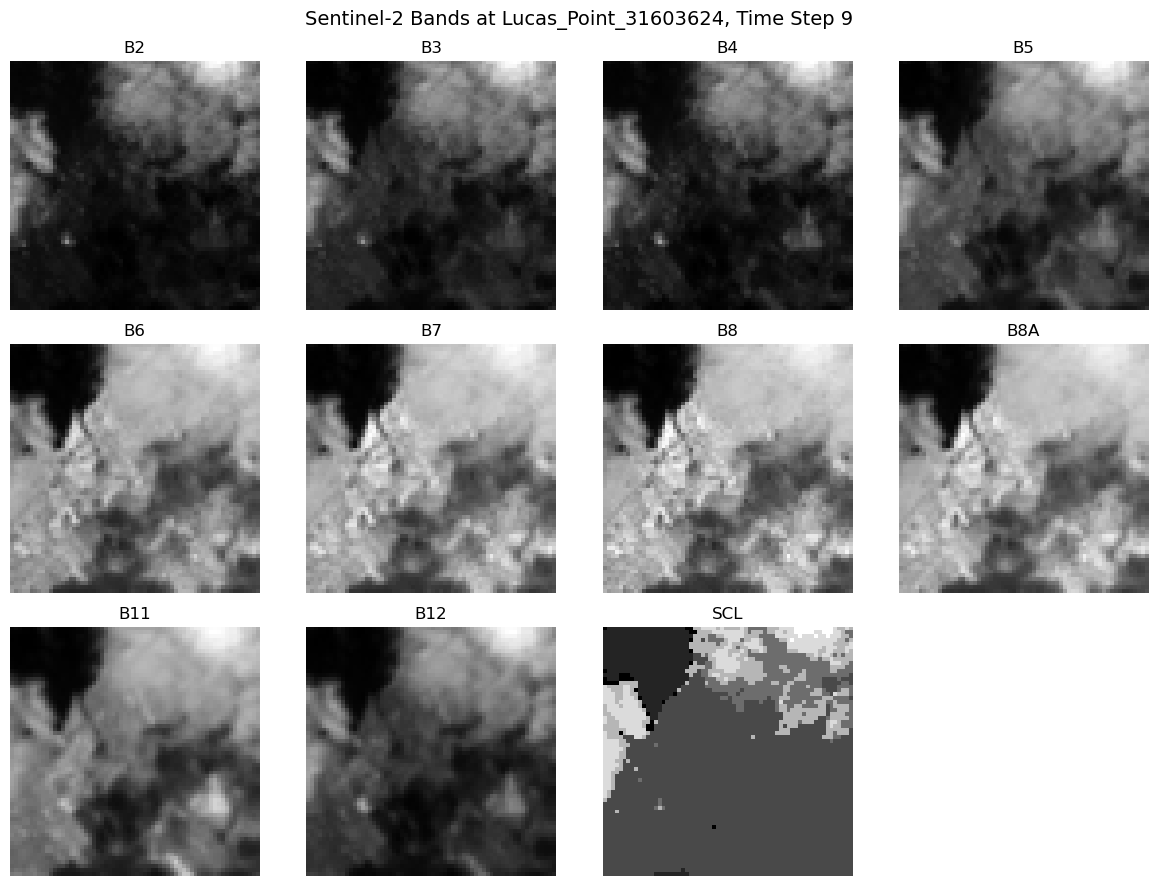

In [9]:
# Visualising all bands of a single LUCAS data point at a specific time step
with h5py.File(file_path, "r") as h5_file:
    # Select a dataset (first available point)
    sample_key = list(h5_file.keys())[3]  
    sample_data = h5_file[sample_key][:]  # Load dataset
    
    num_time_steps = sample_data.shape[0]  # Number of time steps
    band_names = sample_data.dtype.names   # List of available bands

    # Select a time step to visualize
    time_index = 9  
    print(f"Visualizing time step {time_index} of {num_time_steps}")

    fig, axes = plt.subplots(3, 4, figsize=(12, 9))  # 3 rows, 4 cols
    axes = axes.flatten()

    for i, band in enumerate(band_names):
        band_image = sample_data[time_index][band]  # Extract band data
        band_image = (band_image - np.min(band_image)) / (np.max(band_image) - np.min(band_image))  # Normalize

        axes[i].imshow(band_image, cmap="gray")
        axes[i].set_title(band)
        axes[i].axis("off")

    # Hide unused subplots
    for j in range(len(band_names), len(axes)):
        axes[j].axis("off")

    plt.suptitle(f"Sentinel-2 Bands at {sample_key}, Time Step {time_index}", fontsize=14)
    plt.tight_layout()
    plt.show()

In [10]:
labels = []

with h5py.File(file_path, "r") as h5_file:
    for key in h5_file.keys():  
        lc1 = h5_file[key].attrs.get("lc1", "Unknown")  # Primary Land Cover
        lc1_p = h5_file[key].attrs.get("lc1_perc", "Unknown")  # Primary Land Cover %
        lc2 = h5_file[key].attrs.get("lc2", "Unknown")  # Secondary Land Cover
        lc2_p = h5_file[key].attrs.get("lc2_perc", "Unknown")  # Secondary Land Cover %
        
        labels.append({"Lucas_Point": key, "lc1": lc1, "lc1%":lc1_p, "lc2": lc2, "lc2%": lc2_p})

# Convert to DataFrame
df_labels = pd.DataFrame(labels)

df_with_lc2 = df_labels[(df_labels["lc2"] != "") & (df_labels["lc2"] != "Unknown")]
print(df_with_lc2.tail(35))
print(f"\nTotal points with a secondary land cover (lc2): {len(df_with_lc2)}")

                Lucas_Point  lc1       lc1%  lc2       lc2%
9865   Lucas_Point_35283730  A22     > 75 %  F40     > 75 %
10564  Lucas_Point_35423280  A21     > 75 %  E20     > 75 %
10610  Lucas_Point_35423560  A22     > 75 %  E20     > 75 %
10967  Lucas_Point_35483860  B23     > 75 %  B21  10 - 25 %
11222  Lucas_Point_35543258  C10     > 75 %  E20     > 75 %
11763  Lucas_Point_35623862  A22     > 75 %  F40     > 75 %
11998  Lucas_Point_35663856  B71  50 - 75 %  B73  25 - 50 %
12148  Lucas_Point_35703136  A30     > 75 %  E20  25 - 50 %
14379  Lucas_Point_36143430  B32     > 75 %  E30     > 75 %
14470  Lucas_Point_36163424  B32     > 75 %  E30     > 75 %
14477  Lucas_Point_36163476  A22     > 75 %  E20     > 75 %
14539  Lucas_Point_36183428  B11     > 75 %  E30  50 - 75 %
14555  Lucas_Point_36183506  B84     > 75 %  E30     > 75 %
14856  Lucas_Point_36283298  A22     > 75 %  E20  50 - 75 %
14866  Lucas_Point_36283368  A30  50 - 75 %  E20  25 - 50 %
14883  Lucas_Point_36283472  B11  25 - 5